# Dates and Times and Matplotlib

## In Base Python

In [1]:
from datetime import date, time, datetime , timedelta
from dateutil import tz

#run cell
today = date.today()
today

datetime.date(2022, 12, 12)

In [2]:
#run cell
print(today.year)
print(today.month)
print(today.day)

2022
12
4


In [3]:
#run cell
now = datetime.now()
now

datetime.datetime(2022, 12, 4, 23, 11, 11, 278729)

In [4]:
#run cell
print(now.hour)
print(now.minute)
print(now.second)

23
11
11


In [5]:
#run cell
now = datetime.now(tz=tz.tzlocal())
now

datetime.datetime(2022, 12, 4, 23, 11, 11, 309626, tzinfo=tzlocal())

In [6]:
#run cell
now.tzname()

'הגדה המערבית ועזה - שעון רגיל'

In [7]:
#run cell
now = datetime.now(tz=tz.gettz('Europe/Paris'))
print(now)

2022-12-04 22:11:11.420401+01:00


#### Create a date for tomorrow using today plus a 'timedelta' of one day

In [8]:
#CODE HERE


#### How about the date one month from now?


In [10]:
# hint: timedelta can be seconds, minutes, hours and days
#CODE HERE


#### How long until the end of the lesson?

In [11]:
#CODE HERE


## In Numpy

In [2]:
# run cell
import numpy as np 

end = np.datetime64('2022-12-06 17:30')
end

numpy.datetime64('2022-12-06T17:30')

#### What do you think this does?

In [13]:
year = np.datetime64(end,"Y")
hour = np.datetime64(end,"h")
print(year)
print(hour)

2022
2022-12-06T17


#### So if you really want to extract the hour you will need to convert to regular Python datetime using astype(object)


In [14]:
#CODE HERE


#### In NumPy you can use timedelta64

In [15]:
# add an hour to the end of the lesson
# CODE HERE


#### Make an array of all dates between 06.12.2022 and 06.01.2023 using np.arange

In [16]:
#CODE HERE


## In Pandas

In [3]:
# run cell
import pandas as pd

print(pd.Timestamp(year = 2022, month = 12, day = 6, hour = 17, minute = 0, second = 0))
print(pd.Timestamp(2022,12,6,17))
print(pd.Timestamp('06-12-2022 17:00:00'))
print(pd.Timestamp('Dec 6, 2022 17:00:00'))
print(pd.Timestamp(10**10))

2022-12-06 17:00:00
2022-12-06 17:00:00
2022-06-12 17:00:00
2022-12-06 17:00:00
1970-01-01 00:00:10


#### Use to_datetime() with dayfirst = True to convert '06-12-2022 17:00:00' to the correct date

In [18]:
# CODE HERE
pd.to_datetime( '06-12-2022 17:00:00', dayfirst =True)

Timestamp('2022-12-06 17:00:00')

In [19]:
#run cell
year = pd.Period('2022')
print(year)
print(year.start_time)
print(year.end_time)

2022
2022-01-01 00:00:00
2022-12-31 23:59:59.999999999


In [20]:
#run cell
month = pd.Period('2022-12-06',freq='M')
month

Period('2022-12', 'M')

In [21]:
# run cell
month + 6

Period('2023-06', 'M')

#### Use pd.date_range() with periods=7 to create a range of dates for the next 7 days

In [62]:
# CODE HERE
next_7 = pd.date_range('2022-12-06',periods=7)
next_7

DatetimeIndex(['2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09',
               '2022-12-10', '2022-12-11', '2022-12-12'],
              dtype='datetime64[ns]', freq='D')

#### You can use dt on pandas series of dates or times to use methods  like  in base python.

In [63]:
next_7 = pd.Series(next_7)
next_7.dt.day

0     6
1     7
2     8
3     9
4    10
5    11
6    12
dtype: int64

## Matplotlib

### Which type of graph to choose?

1. If the variable is categorical (type str) or quantative discrete (type integer)  and you need to plot the frequencies - use a bar plot or pie plot.
2. If the variable is quantative continuous and you need to plot frequancies - use histogram.
3. If the data is quantative continuous and you want to see its values relative to another variable - use line plot
3. To compare distributions of ordered variables use boxplot.
4. To check if two quantative variables are correlated - use scatter plot.

In [4]:
#run cell
import matplotlib.pyplot as plt

#### Read 'Bakery sales.csv' into data frame, look at first few rows and get info about the columns

In [41]:
#is there an index_col ? 
#CODE HERE
df = pd.read_csv('Bakery sales.csv')
print(df.head())
print(df.info())

   Unnamed: 0        date   time  ticket_number               article  \
0           0  2021-01-02  08:38       150040.0              BAGUETTE   
1           1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2           4  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3           5  2021-01-02  09:14       150041.0                  PAIN   
4           8  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   

   Quantity unit_price  
0       1.0     0,90 €  
1       3.0     1,20 €  
2       2.0     1,20 €  
3       1.0     1,15 €  
4       5.0     1,20 €  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-

####  Try again using parse_date to make pd.read_csv read the date  as datetime 

In [43]:
#CODE HERE
df = pd.read_csv('Bakery sales.csv',parse_dates=['date'])
print(df.head())
print(df.info())

   Unnamed: 0       date   time  ticket_number               article  \
0           0 2021-01-02  08:38       150040.0              BAGUETTE   
1           1 2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2           4 2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3           5 2021-01-02  09:14       150041.0                  PAIN   
4           8 2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   

   Quantity unit_price  
0       1.0     0,90 €  
1       3.0     1,20 €  
2       2.0     1,20 €  
3       1.0     1,15 €  
4       5.0     1,20 €  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     234005 non-null  int64         
 1   date           234005 non-null  datetime64[ns]
 2   time           234005 non-null  object        
 3   ticket_number  234005 non-null  float64   

#### Drop unnecessary unnamed column

In [44]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


#### Make unit_price into a float , discard euro symbol

In [46]:
# CODE HERE
df.unit_price = df.unit_price.str.replace(',','.').str.replace('€','').astype('float')
df.head()

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20
3,2021-01-02,09:14,150041.0,PAIN,1.0,1.15
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20


#### What are the minimum and maximum dates?

In [47]:
#CODE HERE
print(df.date.min(), df.date.max())

2021-01-02 00:00:00 2022-09-30 00:00:00


#### Article is a categorical variable. Make a series of the total numbers of each type of bread bought on 2021-01-02.

In [28]:
 #CODE HERE
df_day1=df.loc[df.date == pd.Timestamp(2022,1,2)] 
article = df_day1.groupby(df_day1.article).Quantity.sum()
article.head()

article
BAGUETTE        55.0
BANETTE         67.0
BANETTINE        8.0
BOISSON 33CL     3.0
BOULE 200G       6.0
Name: Quantity, dtype: float64

#### Now make a bar plot for article

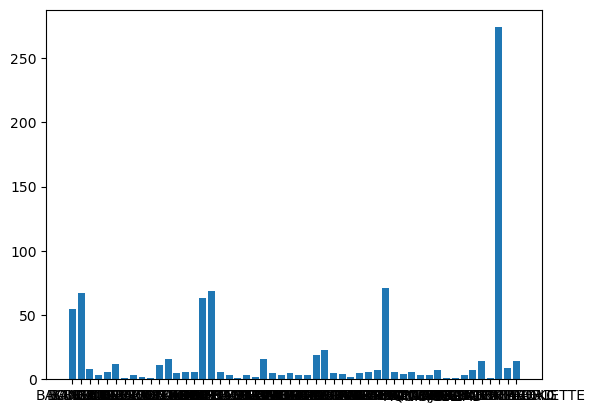

In [29]:
plt.bar(article.index,article)
plt.show()

#### Increase figure size and rotate xticks

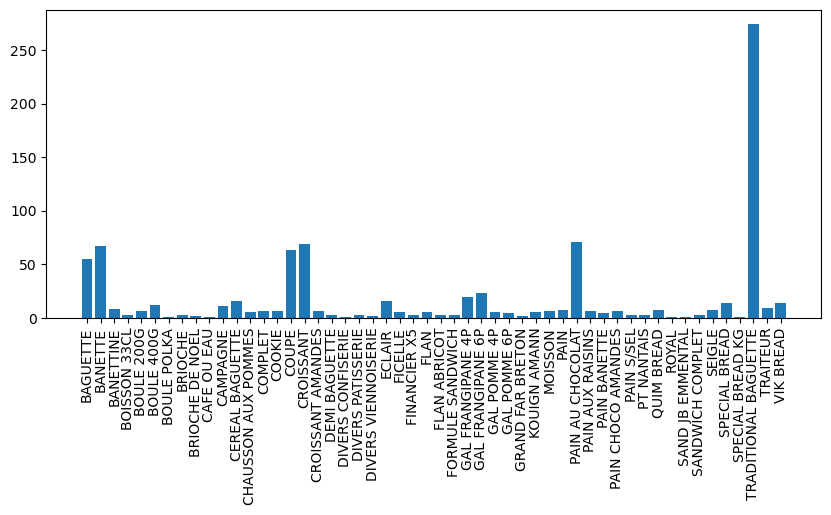

In [30]:
# run cell
plt.rcParams['figure.figsize']=[10,4]
plt.bar(article.index,article)
plt.xticks(rotation=90)
plt.show()

#### We can add axis labels and a title

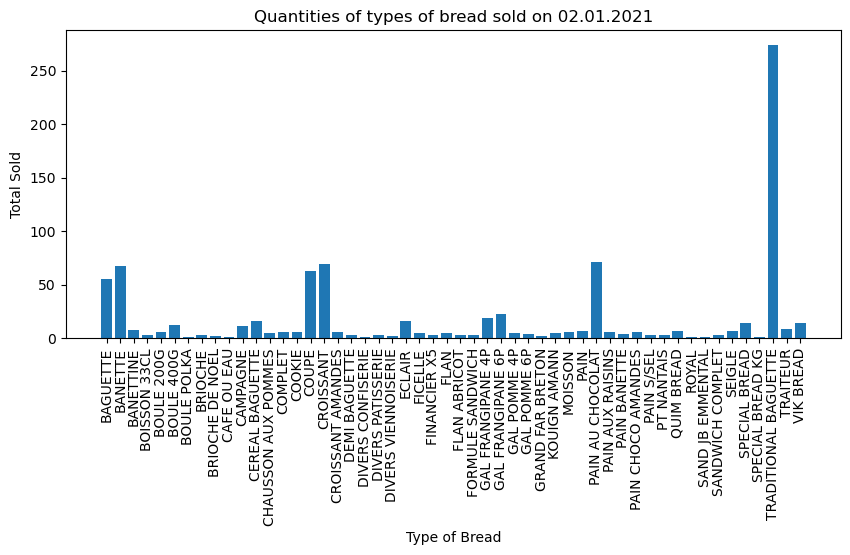

In [31]:
plt.rcParams['figure.figsize']=[10,4]
plt.bar(article.index,article)
plt.xticks(rotation=90)
plt.xlabel('Type of Bread')
plt.ylabel('Total Sold')
plt.title('Quantities of types of bread sold on 02.01.2021')
plt.show()

#### Make pie chart of 8 best selling articles

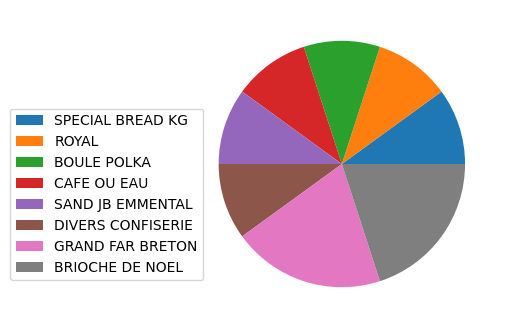

In [32]:
#CODE HERE
plt.rcParams['figure.figsize']=[10,4]
article=article.sort_values()
plt.pie(article.head(8)) #could use nlargest instead of sorting
plt.legend(article.index[:8],loc='lower left',bbox_to_anchor=(-0.6,0.1))
plt.show()

#### Make a series of the total income by month

In [ ]:
# first add a column 'total' containing the total sale by multiplying the quantity bought by the unit price 
# CODE HERE
df['total']=df.Quantity*df.unit_price
income_by_month = df.groupby(df.date.dt.to_period('M')).total.sum()
income_by_month

#### Make a line plot of income_by_month

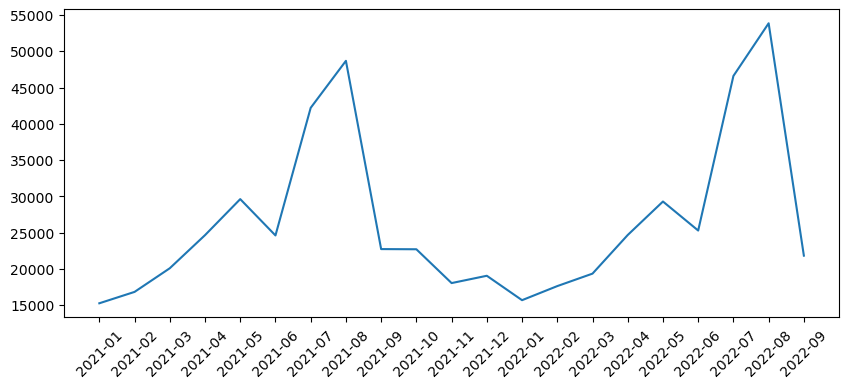

In [34]:
#CODE HERE
plt.plot((income_by_month.index).astype('str'),income_by_month)
plt.xticks(rotation=45)
plt.show()

#### When are the highest sales? When are the lowest?

#### Make a series total_order by grouping by ticket_number and calculating the total sale from each ticket

In [85]:
#CODE HERE
total_order = df.groupby(df.ticket_number).total.sum()


#### Make a boxplot showing the distribution of total_order

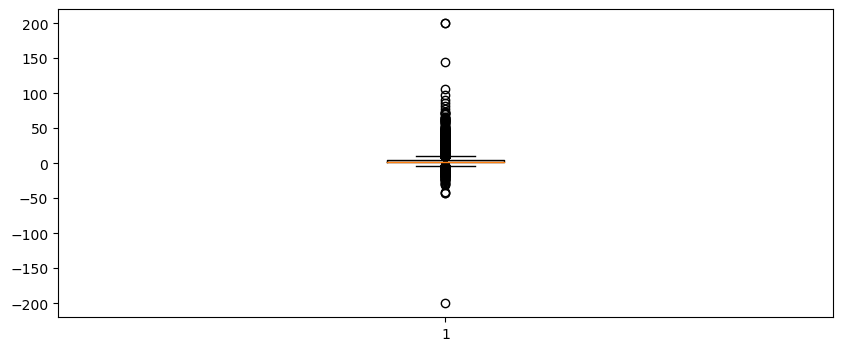

In [77]:
plt.boxplot(total_order)

plt.show()

#### There are too many outliers. Use only prices whose distance from the upper and lower quartiles is less than 1.5 times the IQR.

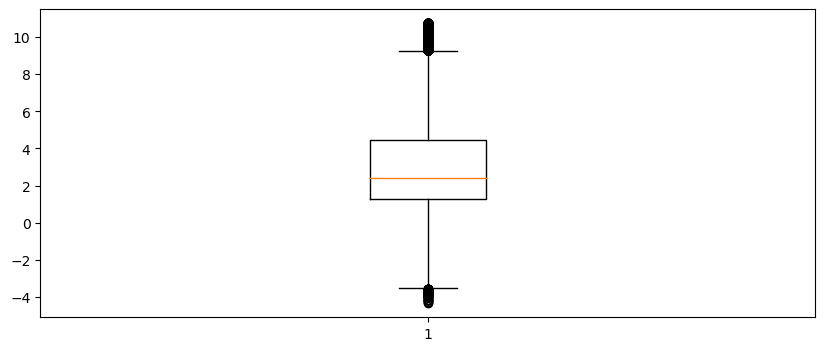

In [80]:
q1=total_order.quantile(0.25)
q3=total_order.quantile(0.75)
IQR = q3-q1
filt =total_order.apply(lambda x: x > q1-1.5*IQR  and x < q3 +1.5*IQR)
filtered_total=total_order[filt]

plt.boxplot(filtered_total)
plt.show()

#### Calculate the mean, median, mode and standard deviation of total order.

In [89]:
#CODE HERE
from scipy import stats
print("mean:",total_order.mean())
print('median: ', total_order.median())
print(stats.mode(total_order,keepdims=True))
print('standard deviation: ',total_order.std())

mean: 4.094076628240578
median:  2.5
ModeResult(mode=array([1.2]), count=array([12649]))
standard deviation:  4.53696531779332


#### Plot histogram for total income by order between 0 and 5

In [82]:
#CODE HERE
filt2 = total_order.apply(lambda x: x>0 and x <=5)
total_order=total_order[filt2]


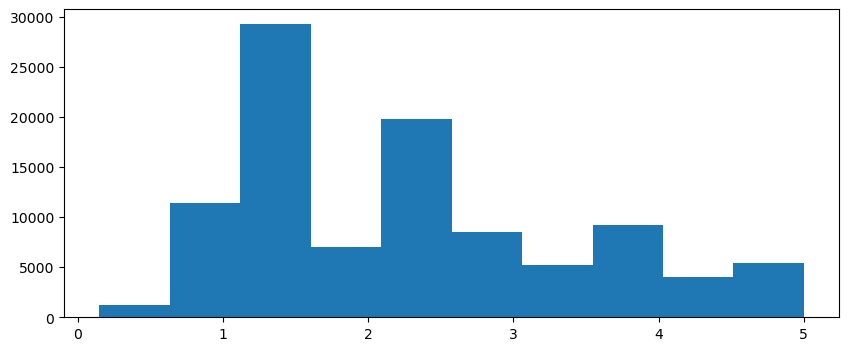

In [83]:
plt.hist(total_order)
plt.show()

#### Make a scatter plot showing the relationship between unit_price and total. Are the variables linearly correlated? Positive or negative correlation?

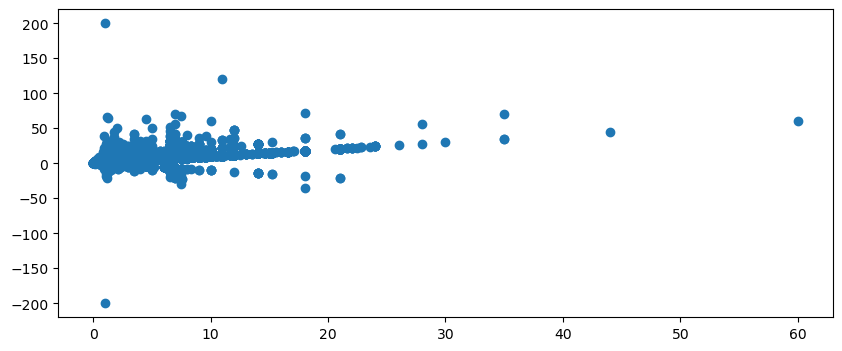

In [42]:
plt.scatter(df.unit_price,df.total)
plt.show()

#### Calculate the correlation coefficient for unit_price and total

In [40]:
np.corrcoef(df.unit_price,df.total)

array([[1.       , 0.6905309],
       [0.6905309, 1.       ]])

In [69]:
np.corrcoef(df.unit_price,df.total)[1][0]

0.6905308951057989